In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read as wav_read
from scipy.io.wavfile import write as wav_write
from IPython.display import Audio

## Load Sound

In [50]:
file_path = '/kaggle/input/kocheng/catsound_3.wav'

try:
    sampling_rate, data = wav_read(file_path)
    print(f"Signal loaded from: {file_path}")
    print(f"Sampling Rate: {sampling_rate} Hz")
    print(f"Dimension Data: {data.shape}")

    # if the audio is stereo (has multiple channels), take only 1 channel
    if len(data.shape) > 1:
        data = data[:, 0]
        print("Signal was stereo, first channel taken.")

    # normalize to float between -1 and 1    
    data = data / np.max(np.abs(data))
    print(f"Signal length (sampel): {len(data)}")
    print(f"Signal duration: {len(data) / sampling_rate:.2f} second")

    # play original sound
    print("\nPlaying original sund:")
    display(Audio(data, rate=sampling_rate))

except FileNotFoundError:
    print(f"Error: File '{file_path}' not found.")
except Exception as e:
    print(f"Something wrong while playing WAV: {e}")

Signal loaded from: /kaggle/input/kocheng/catsound_3.wav
Sampling Rate: 16000 Hz
Dimension Data: (32192,)
Signal length (sampel): 32192
Signal duration: 2.01 second

Playing original sund:


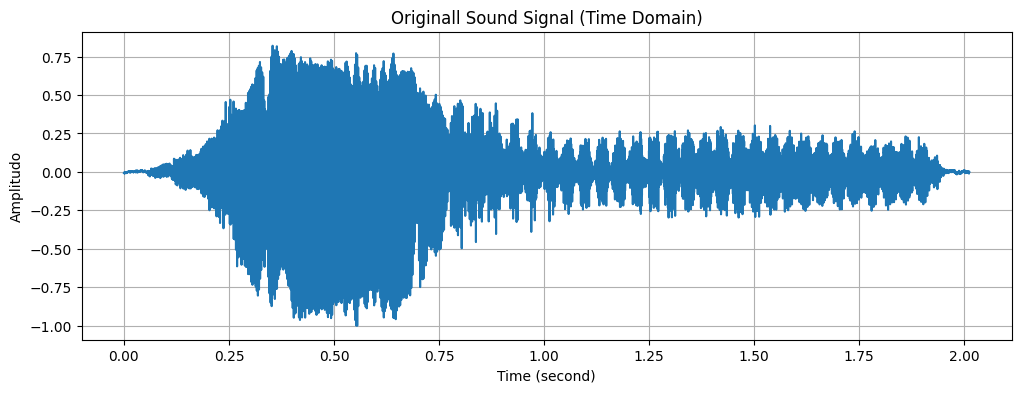

In [51]:
plt.figure(figsize=(12, 4))
# Create a time axis for plotting
time = np.linspace(0, len(data) / sampling_rate, num=len(data))
plt.plot(time, data)
plt.title('Originall Sound Signal (Time Domain)')
plt.xlabel('Time (second)')
plt.ylabel('Amplitudo')
plt.grid(True)
plt.show()

## Compute Frequency Spectrum with FFT

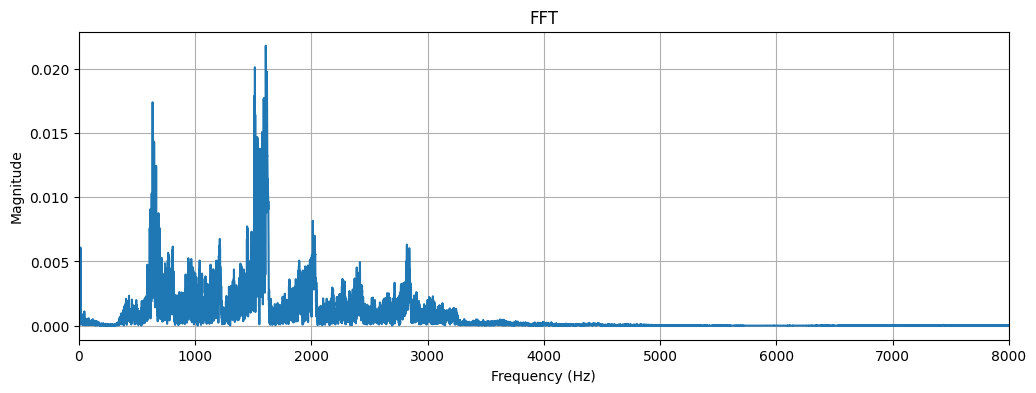

In [52]:
N = len(data) # smaple amount
yf = np.fft.fft(data)
xf = np.fft.fftfreq(N, 1 / sampling_rate) # result as frequency array

# because fft was simetris, just take positive part
xf_positive = xf[:N//2]
yf_positive = 2.0/N * np.abs(yf[0:N//2]) # take magnitude and normalize

# Frequeency Spectrum visualization
plt.figure(figsize=(12, 4))
plt.plot(xf_positive, yf_positive)
plt.title('FFT')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)

plt.xlim(0, sampling_rate / 2)
plt.show()

## Identifying Dominant Frequency

In [53]:
# identifying dominant frequency by highest peak in yf_positive

peak_index = np.argmax(yf_positive) # Find the index of the highest magnitude
dominant_frequency = xf_positive[peak_index] # Get the frequency 
print(f"\nIdentified Dominant Frequencies: {dominant_frequency:.2f} Hz")


Identified Dominant Frequencies: 1608.35 Hz


## Inverse Fast Fourier Transform

In [54]:
# full reconstruct using fft result (yf)
reconstructed_data = np.fft.ifft(yf)
# just take the real part of reconstructed signal
reconstructed_data = np.real(reconstructed_data)
# Ensure the amplitude range matches the original signal
reconstructed_data = reconstructed_data / np.max(np.abs(reconstructed_data))

print("\nSignal reconstructed from frequency domain")

print("\nPlaying reconstructed signal")
display(Audio(reconstructed_data, rate=sampling_rate))


Signal reconstructed from frequency domain

Playing reconstructed signal


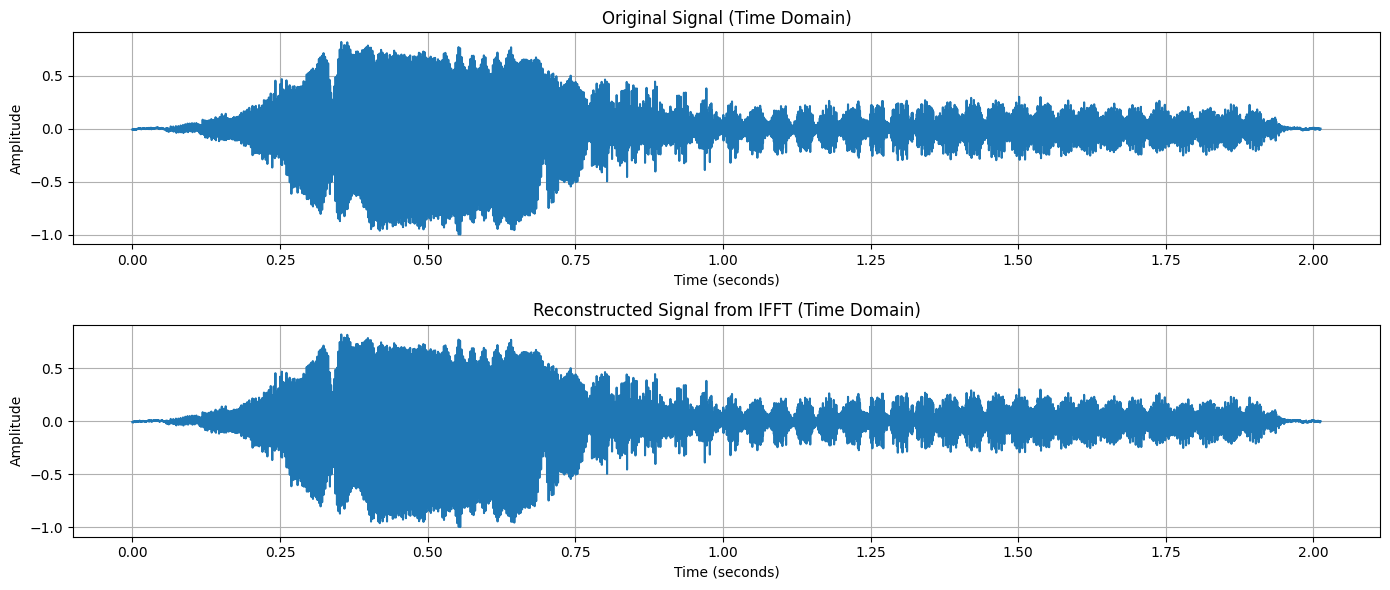

In [55]:
plt.figure(figsize=(14,6))

plt.subplot(2,1,1) # Create a 2x1 grid of plots (first plot)
plt.plot(time, data)
plt.title('Original Signal (Time Domain)')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 1, 2) # Create a 2x1 grid of plots (secondd plot)
plt.plot(time, reconstructed_data)
plt.title('Reconstructed Signal from IFFT (Time Domain)')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout() # Adjusts plot parameters
plt.show()

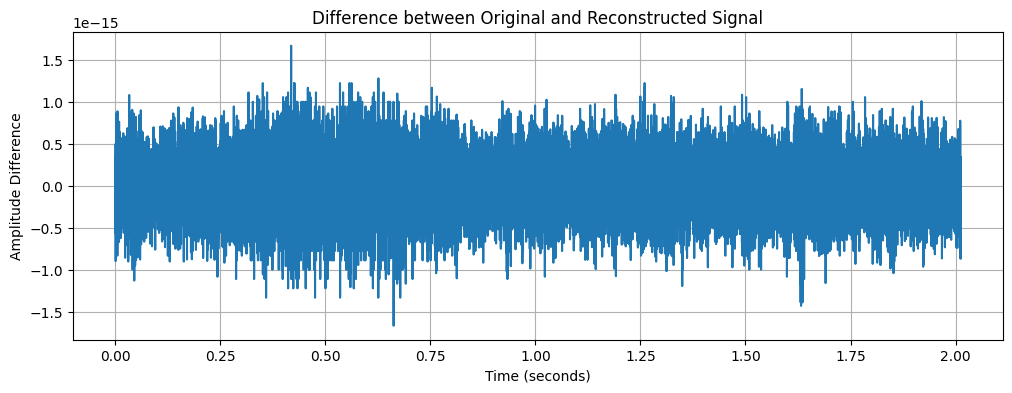

In [56]:
## Visualize the difference between original and reconstructed

plt.figure(figsize=(12, 4))
plt.plot(time, data - reconstructed_data)
plt.title('Difference between Original and Reconstructed Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude Difference')
plt.grid(True)
plt.show()

## Analysis and Reflection

### Proses Eksperimen
1.  **Pengambilan dan Pemuatan Sinyal Suara:** memilih rekaman suara berformat `.wav` dan memuat menggunakan `scipy.io.wavfile.read`. Sinyal kemudian dinormalisasi untuk rentang amplitudo yang konsisten
2.  **Analisis Spektrum Frekuensi (FFT):** sinyal waktu diubah ke domain frekuensi dengan `numpy.fft.fft`. spekktrum magnitudo yang dihasilkan menunjukkan komponen frekuensi dominan
3.  **Identifikasi Frekuensi Dominan:** di plot spektrum, nampak beberapa puncak frekuensi yang merepresentasikan nada-nada kuat dalam suara. misal, keitka mengidentifikasi frekuensi dominan di sekitar 1600 Hz
4.  **Rekonstruksi Sinyal Waktu (IFFT):** sektrum frekuensi yang diperoleh dari FFT kemudian digunakan untuk merekonstruksi kembali sinyal di domain waktu menggunakan `numpy.fft.ifft`. Bagian real dari hasil IFFT diaambil sebagai sinyal yang direkonstruksi
5.  **Visualisasi dan Perbandingan:** sinyal asli dan sinyal yang direkonstruksi divisualisasikan berdampingan untuk membandingkan bentuk gelombang dan memastikan integriitas rekonstruksi